In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/DATA

/content/drive/MyDrive/DATA


#1.Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from collections import Counter
from sklearn.tree import  DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split

import warnings
warnings.filterwarnings('ignore')

#2.Import Dataset

In [ ]:
company_data = pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


#3.data Exploration

In [ ]:
company_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
company_data.shape

(400, 11)

In [ ]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


#Feature Engineering

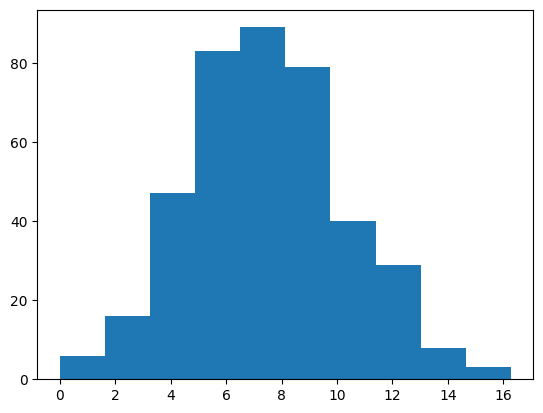

In [ ]:
plt.hist('Sales',data= company_data)
plt.show()

#As the Sales distribution is not skewed and it is normal distribution we can take mean or median as a threshold to make two or three categories 'Low', 'Medium' and 'High' Sales
*For three categories lets divide the Sales values with Quartiles , less than first quartile as 'Low' , between Second Quartile as 'Medium and above Third Quartile as 'High'

In [ ]:
company_data1 = company_data.copy()
company_data1['Sales_cat'] = pd.cut(x = company_data1['Sales'], bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
company_data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [ ]:
company_data1.Sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

In [ ]:
company_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_cat    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [ ]:
categorical_features = company_data1.describe(include=["object",'category']).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')

In [ ]:
numerical_features = company_data1.describe(include=["int64","float64"]).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

#4.Exploratory Data Analysis

#Univariate Plots

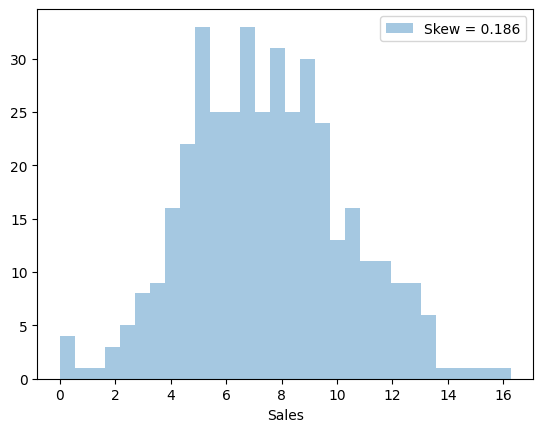

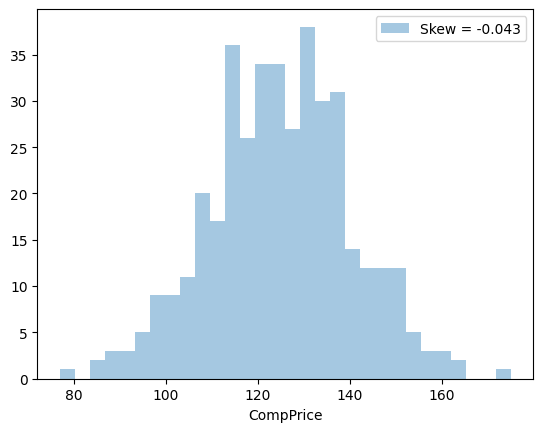

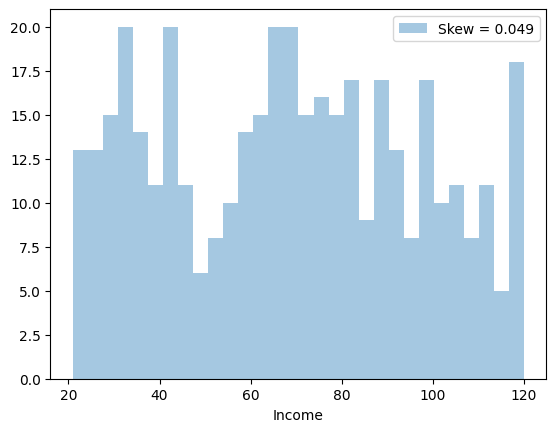

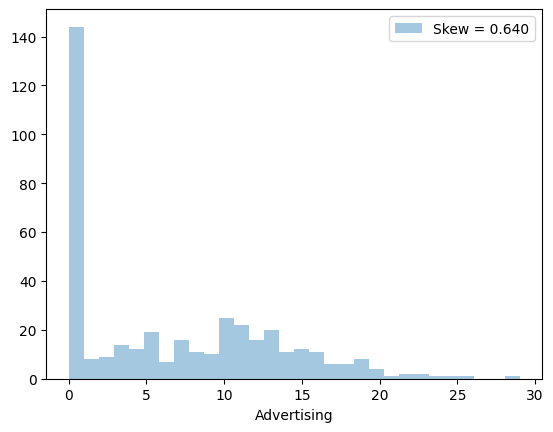

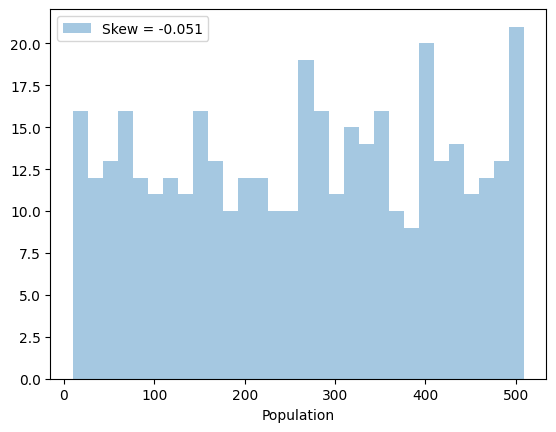

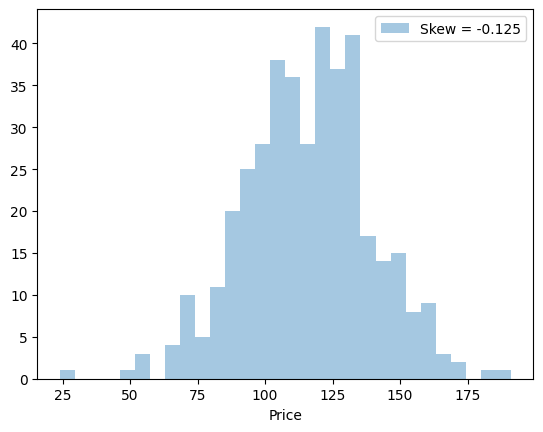

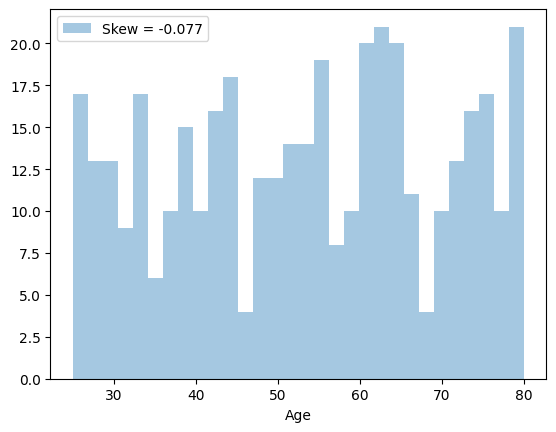

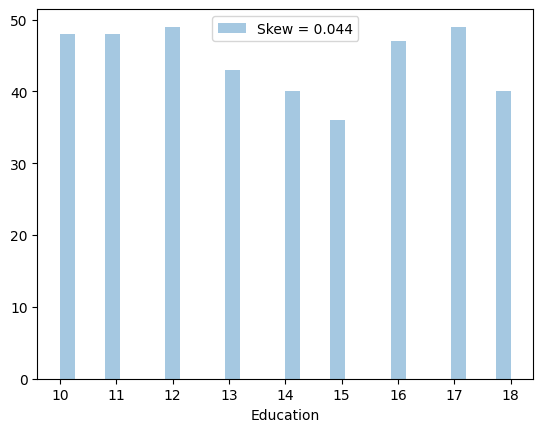

In [ ]:
numerical_features = [feature for feature in company_data.columns if company_data[feature].dtypes != 'O']
for feat in numerical_features:
    skew = company_data[feat].skew()
    sns.distplot(company_data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

#Observation

*None of the features is normally distributed.



#Outliers

In [ ]:
numerical_features

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education']

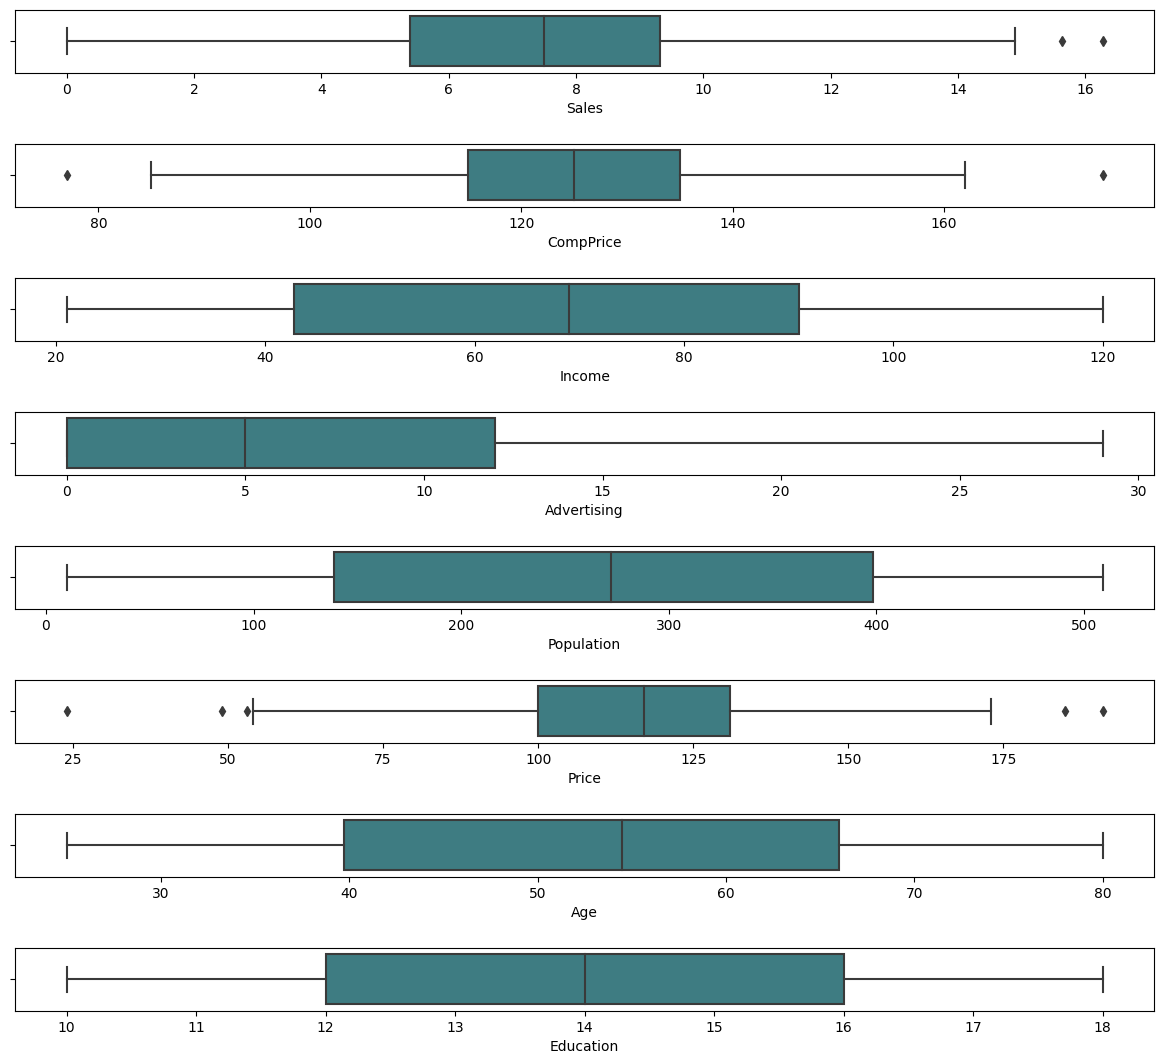

In [ ]:
outliers = company_data.copy()
fig, axes = plt.subplots(8,1,figsize=(12,11),sharex=False,sharey=False)
sns.boxplot(x='Sales', data= outliers,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data= outliers,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data= outliers,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data= outliers,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data= outliers,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data= outliers,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data= outliers,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data= outliers,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)

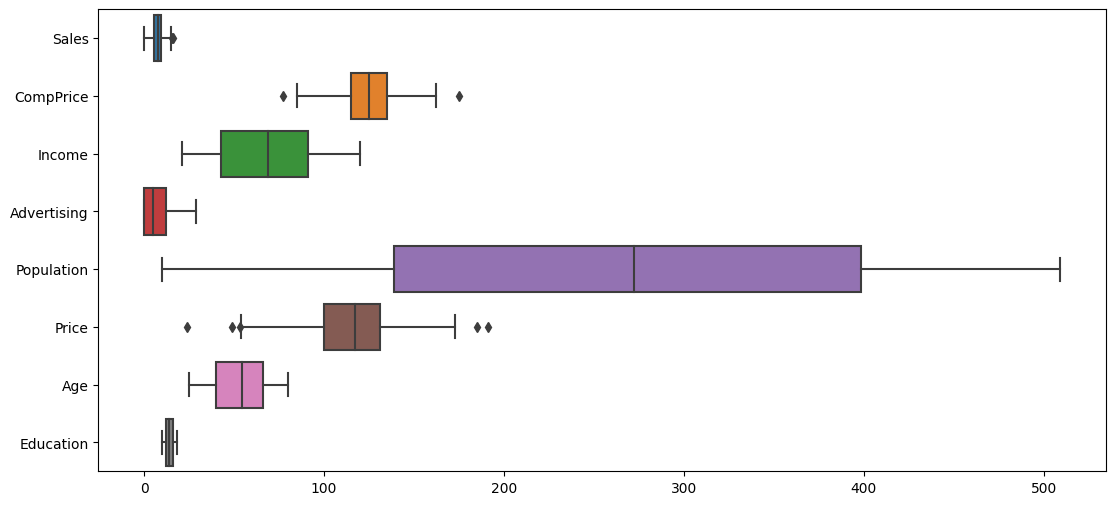

In [ ]:
plt.figure(figsize=(13,6))
sns.boxplot(data=company_data[numerical_features], orient="h")
plt.show()

#Observation:

*Population has a mean that is much superior to the other constituents as we already saw in the previous section.



#Multivariate Analysis

* Let's now proceed by drawing a pairplot to visually examine the correlation between the features.



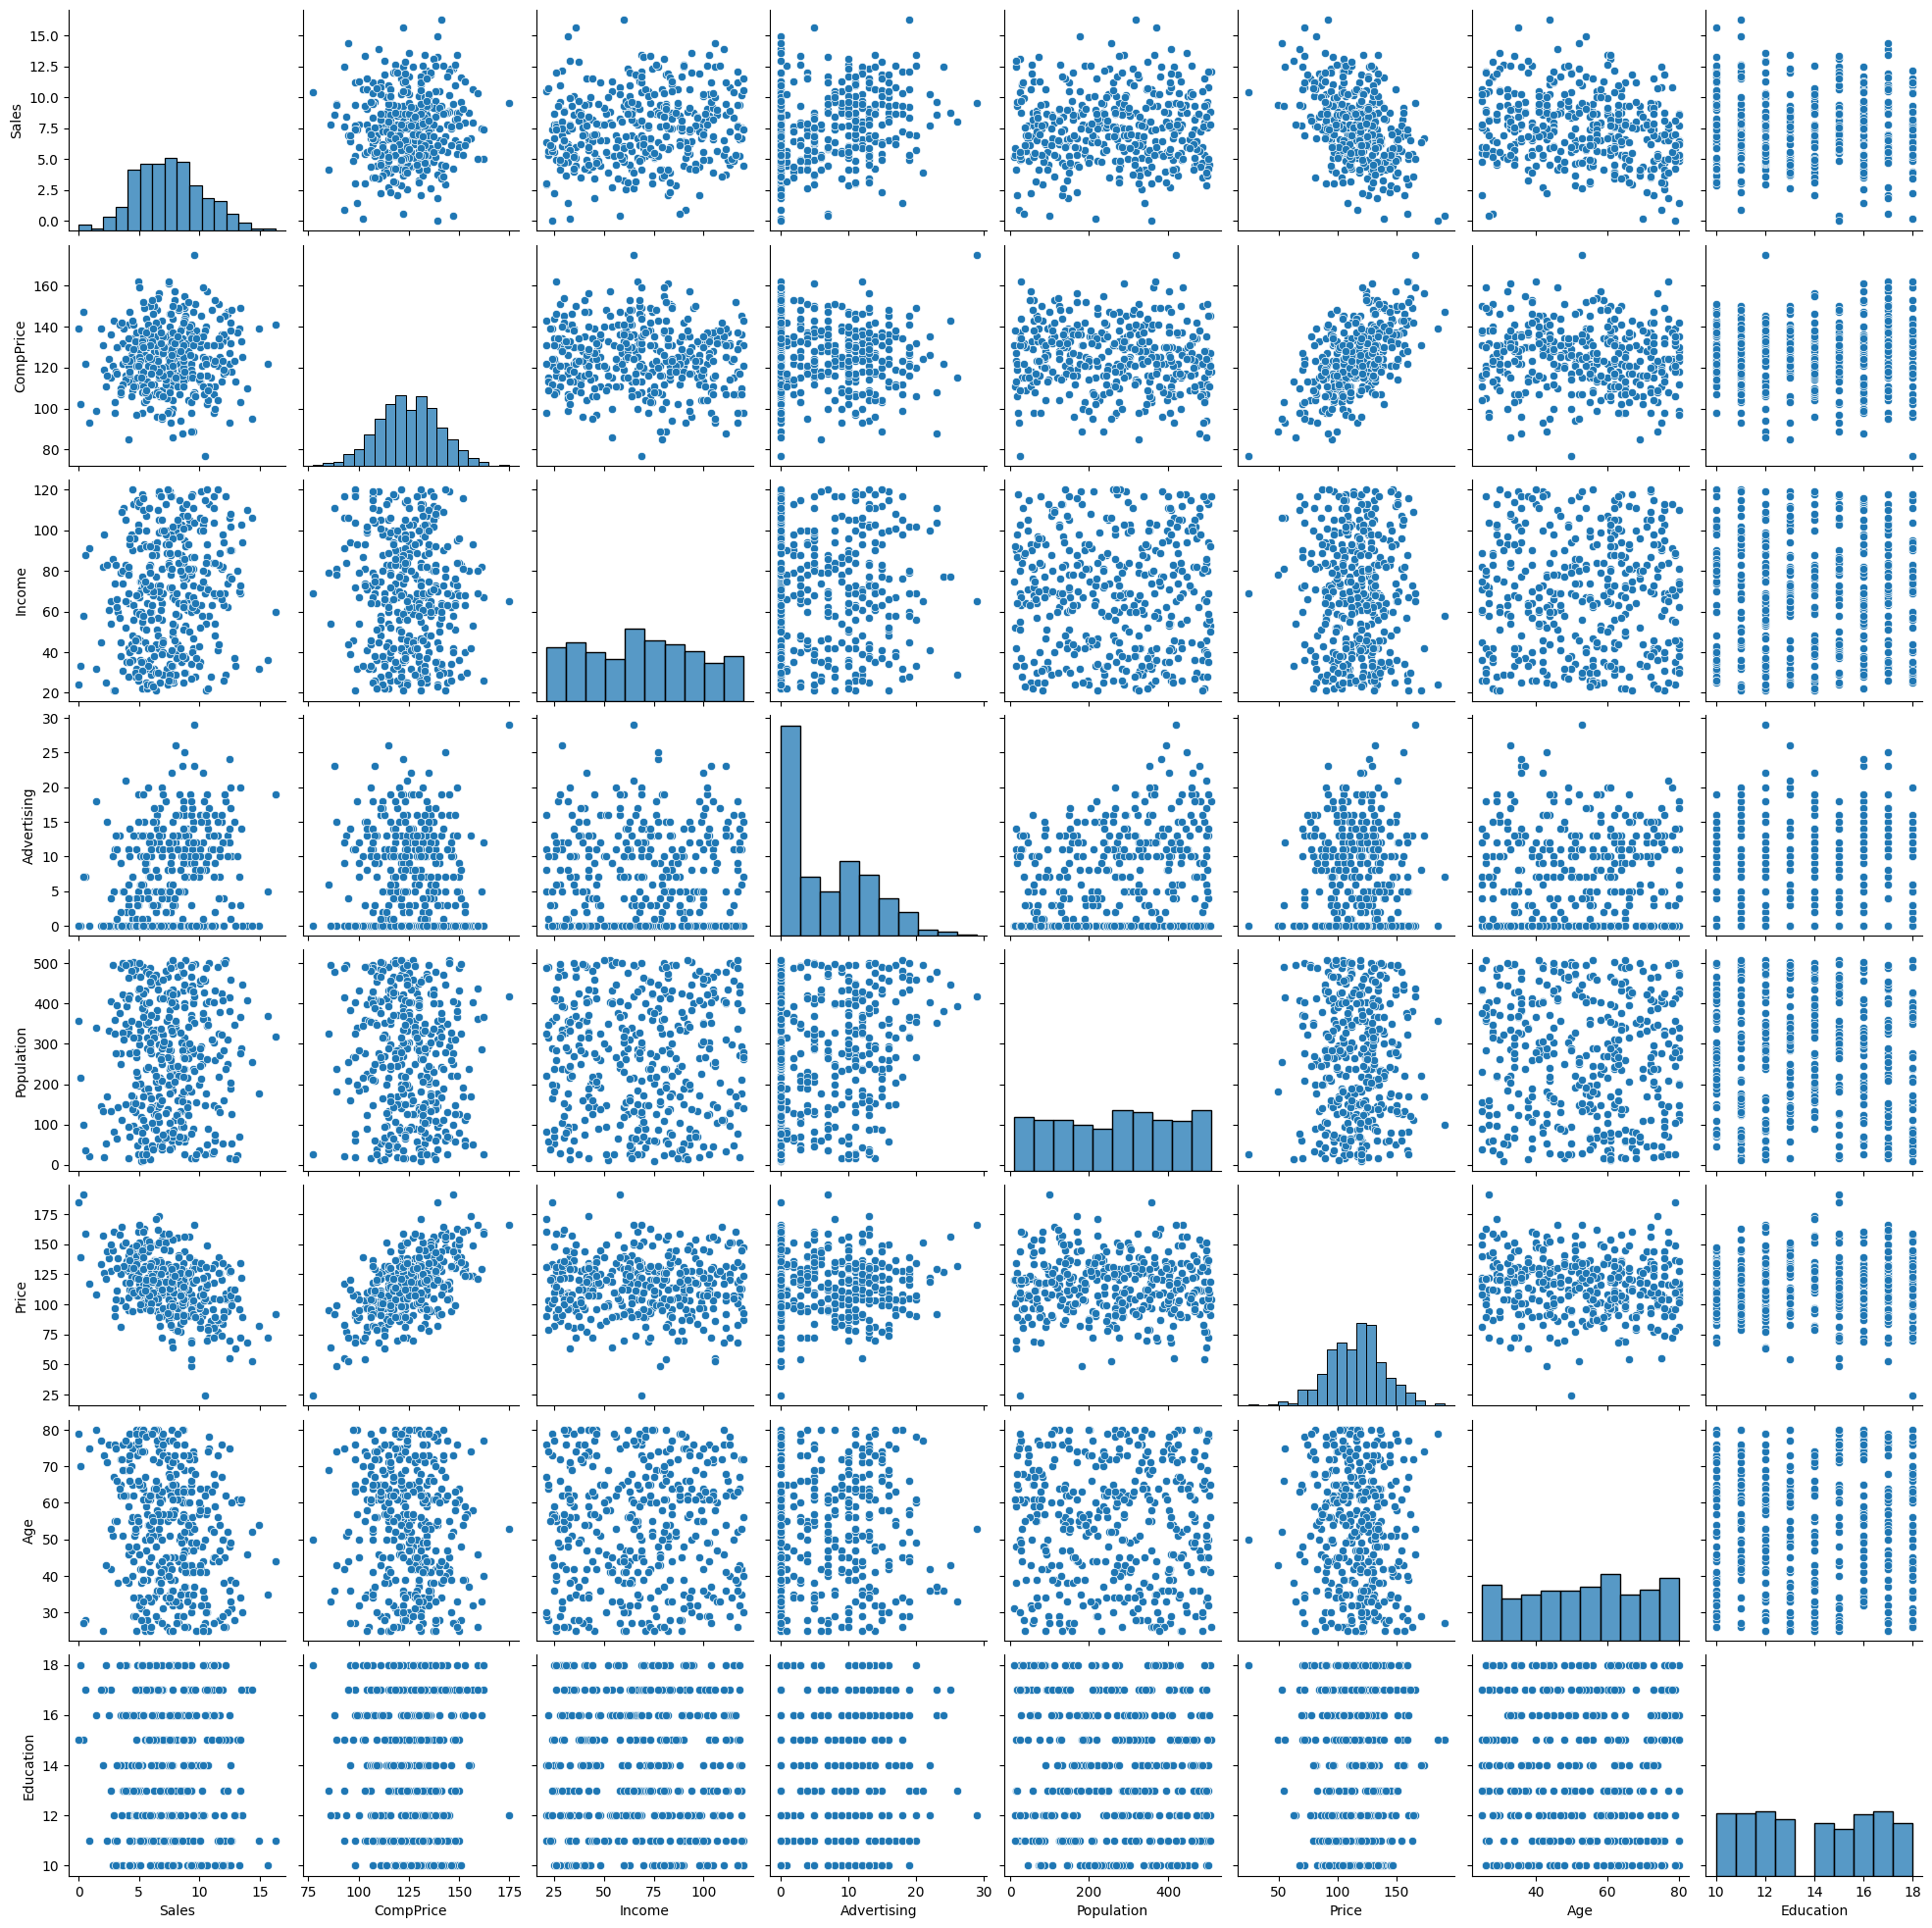

In [ ]:
sns.pairplot(company_data, palette='coolwarm')
plt.show()

#Having A Look At the correlation Matrix

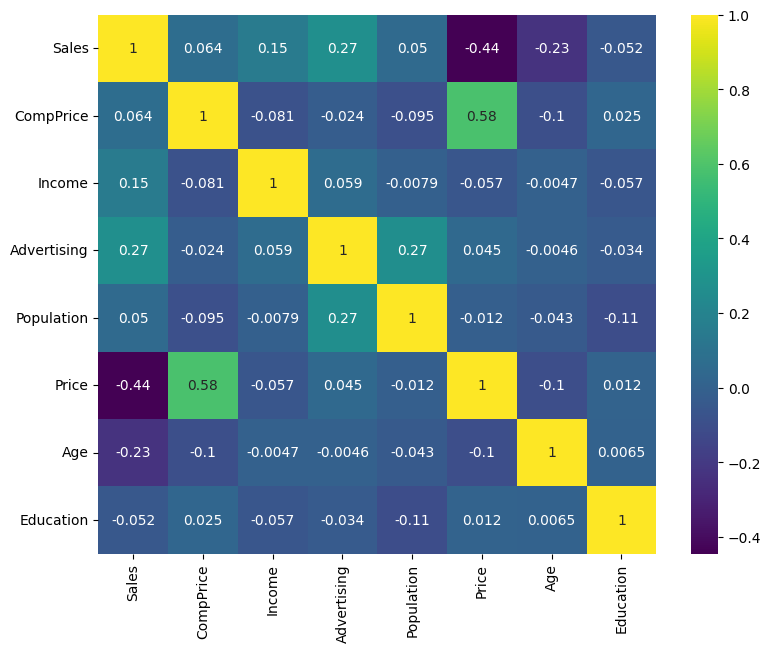

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(company_data.corr(), annot=True, fmt='.2g', cmap="viridis")
plt.show()

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')


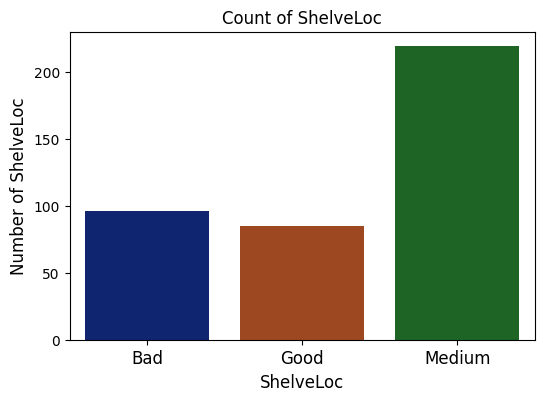

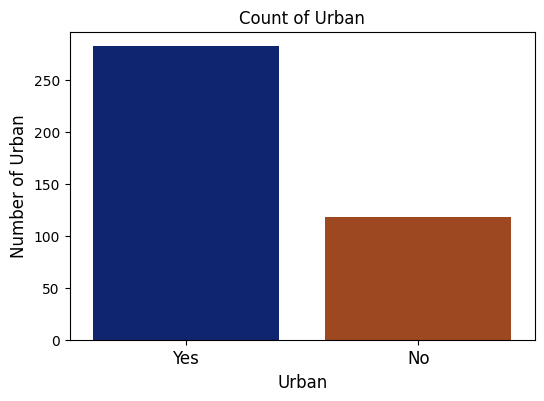

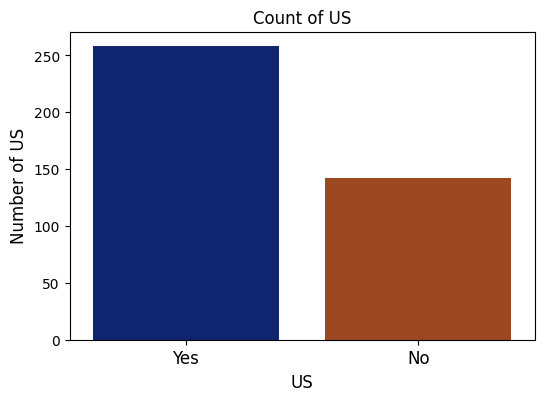

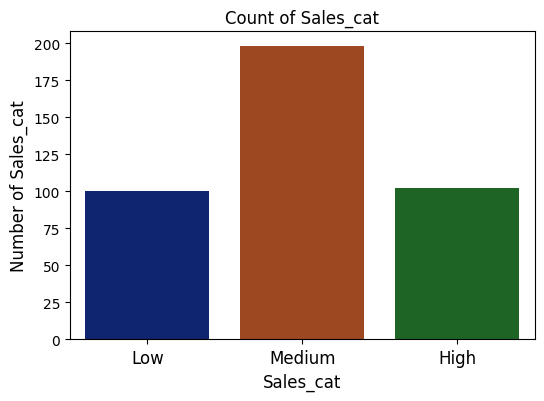

In [ ]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(6,4))
    unique = company_data1[column].value_counts(ascending=True);
    plt.title("Count of "+ column)
    sns.countplot(data= company_data1, x=column, palette = "dark")
    plt.xticks(rotation = 0, size = 12)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
plt.show()

#lets plot pair plot to visualise the attributes all at once

In [ ]:
sns.pairplot(data= company_data1, hue = 'Sales_cat')
plt.show()

In [ ]:
company_data_dummi = company_data1.copy()
company_data_dummi.drop('Sales',axis=1, inplace =True)
company_data_dummi = pd.get_dummies(company_data_dummi.iloc[:,:-1])
company_data_dummi.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


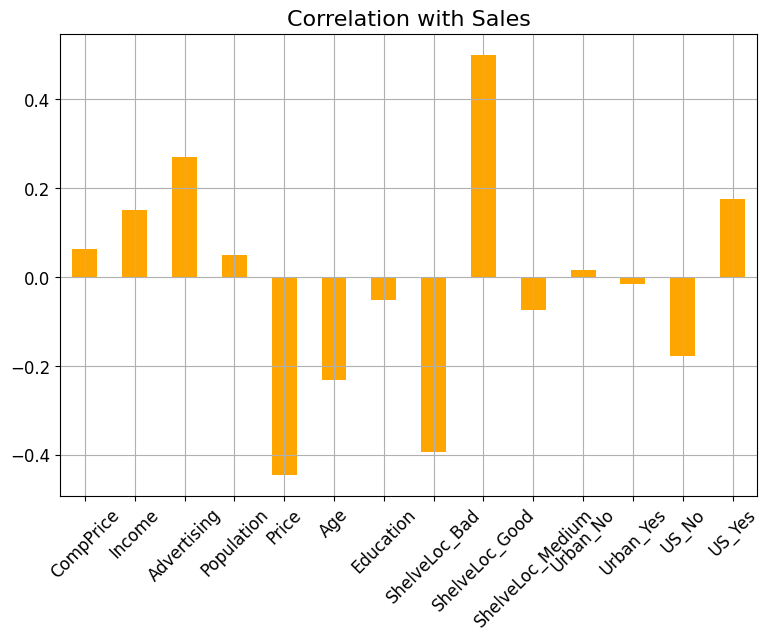

In [ ]:
company_data2 = company_data_dummi.copy()

correlations = company_data2.corrwith(company_data1.Sales)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize = (9,6), fontsize = 12, color = 'orange', rot = 45, grid = True)
plt.title('Correlation with Sales',fontsize = "16")
plt.show()

#Checking for Imbalanced or balanced dataset with regards to the Target

In [ ]:
plt.figure(figsize = (9,7))
plt.pie(company_data1['Sales_cat'].value_counts(), labels= company_data1.Sales_cat.unique(), explode = [0.01,0.01,0.01],
       autopct= '%.2f%%', startangle= 181, textprops = {'size':'large','fontweight':'bold','rotation':'0','color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 14, fontweight = 'bold')
plt.show()

#imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

*Here, the class “High” is called the majority class, and the much smaller in size “Low” and “Medium” class is called the minority class.

In [ ]:
company_data1.Sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

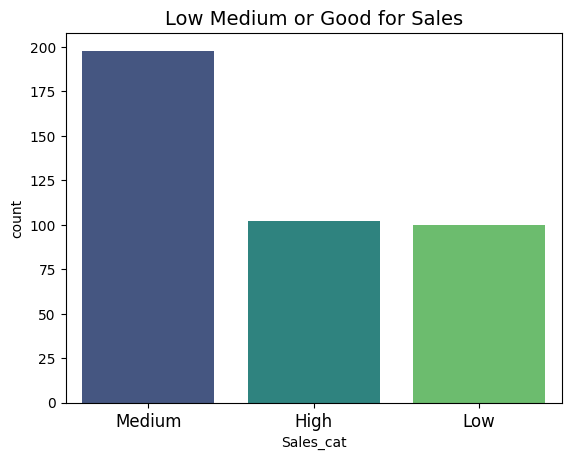

In [ ]:
sns.countplot(x= 'Sales_cat', data= company_data1, palette= 'viridis', order= company_data1['Sales_cat'].value_counts().index)
plt.xticks(fontsize= 12)
plt.title('Low Medium or Good for Sales', fontsize= 14)
plt.show()

#5.Data Pre-processing

In [ ]:
company_data3 = company_data1.copy()
company_data3.drop('Sales',axis=1, inplace =True)
company_data3 = pd.get_dummies(company_data3.iloc[:,:-1])
company_data3.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [ ]:
company_data3['Sales'] = company_data1.Sales_cat
company_data3.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,High
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,High
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,Medium
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,Low


#Label Encoding

In [ ]:
le = LabelEncoder()
le.fit(company_data3["Sales"])
company_data3["Sales"]=le.transform(company_data3["Sales"])
company_data3.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,2
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1


#Split into input(x) and output(y) Variables

In [ ]:
x = company_data3.iloc[:, :-1]
y=  company_data3.Sales

#Feature Extraction

In [ ]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y)

#summarize scores

In [ ]:
scores = fit.scores_
features = fit.transform(x)

In [ ]:
score_company_data = pd.DataFrame(list(zip(scores, x.columns)), columns =['Score', 'Feature'])
score_company_data.sort_values(by="Score", ascending=False, inplace=True)
score_company_data

,Score,Feature
4,300.881058,Price
2,251.767458,Advertising
3,141.113336,Population
5,106.577639,Age
8,66.174919,ShelveLoc_Good
1,65.145403,Income
7,48.524460,ShelveLoc_Bad
12,13.109136,US_No
9,8.654770,ShelveLoc_Medium
13,7.215106,US_Yes


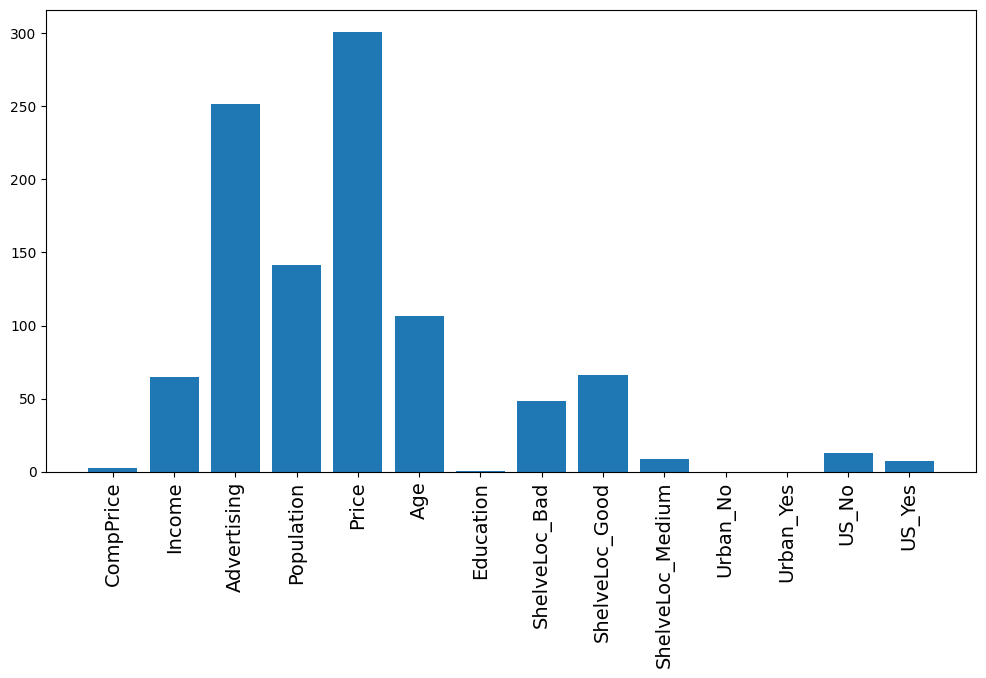

In [ ]:
fig, axes = plt.subplots(figsize=(12,6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation= 90, size= 14)
plt.show()

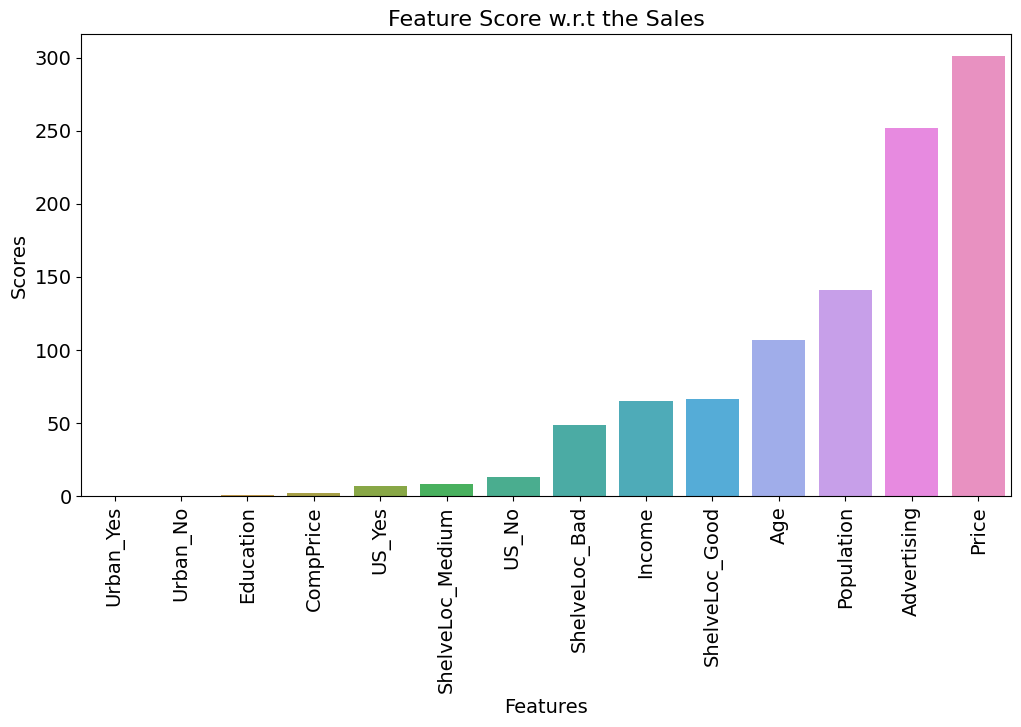

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Feature', y="Score", data= score_company_data, order=score_company_data.sort_values('Score').Feature)
plt.xlabel("Features", size=14)
plt.ylabel("Scores", size=14)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Feature Score w.r.t the Sales", size=16)
plt.show()

In [ ]:
model_data = company_data3[['Price', 'Advertising','Population', 'Income', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Bad', 'ShelveLoc_Medium','Sales']]
model_data.head()

,Price,Advertising,Population,Income,Age,ShelveLoc_Good,ShelveLoc_Bad,ShelveLoc_Medium,Sales
0,120,11,276,73,42,0,1,0,0
1,83,16,260,48,65,1,0,0,0
2,80,10,269,35,59,0,0,1,0
3,97,4,466,100,55,0,0,1,2
4,128,3,340,64,38,0,1,0,1


#6. Model Building

#StratifiedKFold

In [ ]:
x = model_data.drop('Sales',axis=1)
y = model_data[['Sales']]

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(x, y):
# select rows
    train_x, test_x = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]

# summarize train and test composition
    train, train1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test, test1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train, train1, test, test1))

>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40


#Test Train Split With Imbalanced Dataset

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10,stratify=y)

In [ ]:
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=320, 1=320, Test: 0=80, 1=80


In [ ]:
# summarize train and test composition
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({'Sales': 1}) Testing Data Counter({'Sales': 1})


In [ ]:
print("Shape of x_train : ",x_train.shape)
print("Shape of x_test  : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of x_train :  (320, 8)
Shape of x_test  :  (80, 8)
Shape of y_train :  (320, 1)
Shape of y_test  :  (80, 1)


#7. Model Training And Testing

#Grid search using Stratified Kfold Splits on Imbalanced Dataset

In [ ]:
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n==========================================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n==========================================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
params = {"criterion":["gini", "entropy"], "splitter":["best", "random"], "max_depth":(list(range(1,10))),
          "min_samples_split":[2, 3, 4], "min_samples_leaf":list(range(1,10))}

tree_clf = DecisionTreeClassifier(random_state=10)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(train_x, train_y)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(train_x, train_y)
print_score(tree_clf, train_x, train_y, test_x, test_y, train=True)
print_score(tree_clf, train_x, train_y, test_x, test_y, train=False)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best paramters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 75.83%
__________________________________________________________________________
CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision   0.778947   0.766234    0.744681  0.758333    0.763287   
recall      0.804348   0.655556    0.786517  0.758333    0.748807   
f1-score    0.791444   0.706587    0.765027  0.758333    0.754353   
support    92.000000  90.000000  178.000000  0.758333  360.000000   

           weighted avg  
precision      0.758826  
recall         0.758333  
f1-score       0.757168  
support      360.000000  
__________________________________________________________________________
Confusion Matrix: 
 [[ 74   0  18]
 [  1  59  30]
 [ 20  18 140]]

Test Result:
Accuracy Score: 55.00%
_________________________

#Get score for different values Of n

In [ ]:
decision_tree = DecisionTreeClassifier()
skf1 = StratifiedKFold(n_splits=15, shuffle=True, random_state=15)
results = cross_val_score(decision_tree, train_x, train_y, cv=skf1)
print(results.mean())

0.6


In [ ]:
params1 = {"criterion":["gini","entropy"],"max_depth":range(1,10),
              "min_samples_split":range(1,10),"min_samples_leaf":range(1,10)}

grid = GridSearchCV(decision_tree, param_grid = params1, cv=skf1, verbose=1, n_jobs=6)
grid.fit(train_x,train_y)
model1 = grid.best_estimator_

Fitting 15 folds for each of 1458 candidates, totalling 21870 fits


In [ ]:
grid.best_score_

0.6888888888888887

In [ ]:
predict_output1 = model1.predict(test_x)
accuracy_test1 = accuracy_score(test_y,predict_output1)
accuracy_test1

0.625

              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.56      0.50      0.53        10
           2       0.60      0.75      0.67        20

    accuracy                           0.62        40
   macro avg       0.66      0.58      0.61        40
weighted avg       0.65      0.62      0.62        40



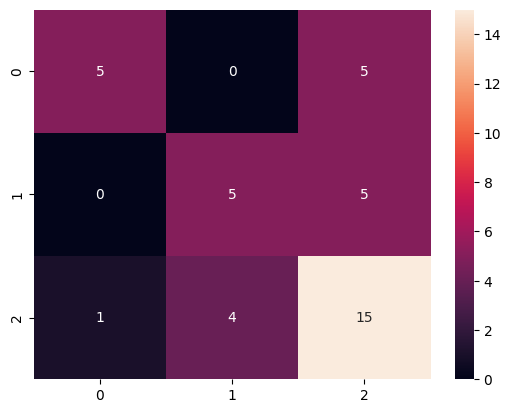

In [ ]:
sns.heatmap(confusion_matrix(test_y, predict_output1),annot=True)
print(classification_report(test_y,predict_output1))

#Grid search using Train Test Splits Stratifying Target feature on Imbalanced Dataset

In [ ]:
params = {"criterion":["gini", "entropy"], "splitter":["best", "random"], "max_depth":(list(range(1,10))),
          "min_samples_split":[2, 3, 4], "min_samples_leaf":list(range(1,10))}

tree_clf = DecisionTreeClassifier(random_state= 12)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 67.50%
__________________________________________________________________________
CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision   0.731707   0.700000    0.643617     0.675    0.691775   
recall      0.731707   0.437500    0.765823     0.675    0.645010   
f1-score    0.731707   0.538462    0.699422     0.675    0.656530   
support    82.000000  80.000000  158.000000     0.675  320.000000   

           weighted avg  
precision      0.680286  
recall         0.675000  
f1-score       0.667455  
support      320.000000  
__________________________________________________________________________
Confusion Matrix: 
 [[ 60   0  22]
 [  0  35  45]
 [ 22  15 121]]

Test Result:
Accuracy Score: 68.75%
____________________

#Get Score For differenr Values Of n

In [ ]:
decision_tree = DecisionTreeClassifier()
skf2 = StratifiedKFold(n_splits=15, shuffle=True, random_state=20)

results = cross_val_score(decision_tree, x_train, y_train, cv=skf2)
print(results.mean())

0.5815295815295815


In [ ]:
params2 = {"criterion":["gini","entropy"], "max_depth":range(1,10),
              "min_samples_split":range(1,10), "min_samples_leaf":range(1,10)}

grid = GridSearchCV(decision_tree, param_grid= params2, cv=skf2, verbose=1, n_jobs=6)
grid.fit(x_train,y_train)
model2 = grid.best_estimator_

Fitting 15 folds for each of 1458 candidates, totalling 21870 fits


In [ ]:
grid.best_score_

0.687012987012987

In [ ]:
predict_output2 = model2.predict(x_test)
accuracy_test2 = accuracy_score(y_test,predict_output2)
accuracy_test2

0.65

              precision    recall  f1-score   support

           0       0.70      0.80      0.74        20
           1       0.58      0.55      0.56        20
           2       0.66      0.62      0.64        40

    accuracy                           0.65        80
   macro avg       0.64      0.66      0.65        80
weighted avg       0.65      0.65      0.65        80



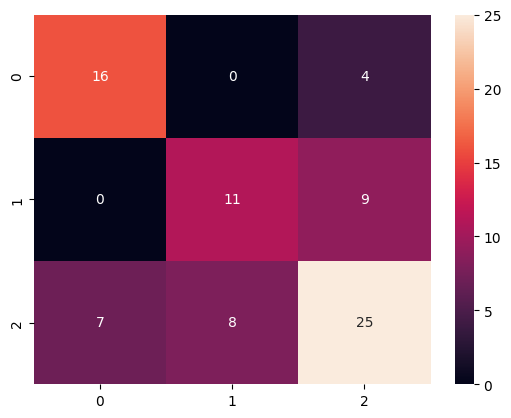

In [ ]:
sns.heatmap(confusion_matrix(y_test, predict_output2),annot=True)
print(classification_report(y_test,predict_output2))

#Observation:

* In both the condition, due to imbalanced dataset our results are getting biased towards the majority. The model is correctly classifying all the majority classes yet fails to classify the minority classes. Hence, we need to use some kind of oversampling techniques to balance the dataset.



#8.Pruning

In [ ]:
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n==========================================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n==========================================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

params = {"criterion":("gini", "entropy"), "splitter":("best", "random"), "max_depth":(list(range(1,10))),
          "min_samples_split":[2, 3, 4], "min_samples_leaf":list(range(1,10))}


tree_clf = DecisionTreeClassifier(random_state= 21)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 10 folds for each of 972 candidates, totalling 9720 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 82.19%
__________________________________________________________________________
CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision   0.819277   0.814815    0.826923  0.821875    0.820338   
recall      0.829268   0.825000    0.816456  0.821875    0.823575   
f1-score    0.824242   0.819876    0.821656  0.821875    0.821925   
support    82.000000  80.000000  158.000000  0.821875  320.000000   

           weighted avg  
precision      0.821937  
recall         0.821875  
f1-score       0.821874  
support      320.000000  
__________________________________________________________________________
Confusion Matrix: 
 [[ 68   1  13]
 [  0  66  14]
 [ 15  14 129]]

Test Result:
Accuracy Score: 67.50%
_____________________

#This is a balanced state of training and testing accuracy are close to each other where there is no overfitting or underfitting yet we can do better than this, let's try post pruning technique using Alpha Values

In [ ]:
clf = DecisionTreeClassifier(**best_params)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=6)

In [ ]:
pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)

In [ ]:
print('Training Accuracy :',accuracy_score(y_train, pred_train).round(3))
print('Testing Accuracy  :',accuracy_score(y_test, pred_test).round(3))

Training Accuracy : 0.816
Testing Accuracy  : 0.638


#Building Decision Tree Classifier using Entropy Criteria with Alpha values Post Pruning

In [ ]:
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state= 13)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=13)

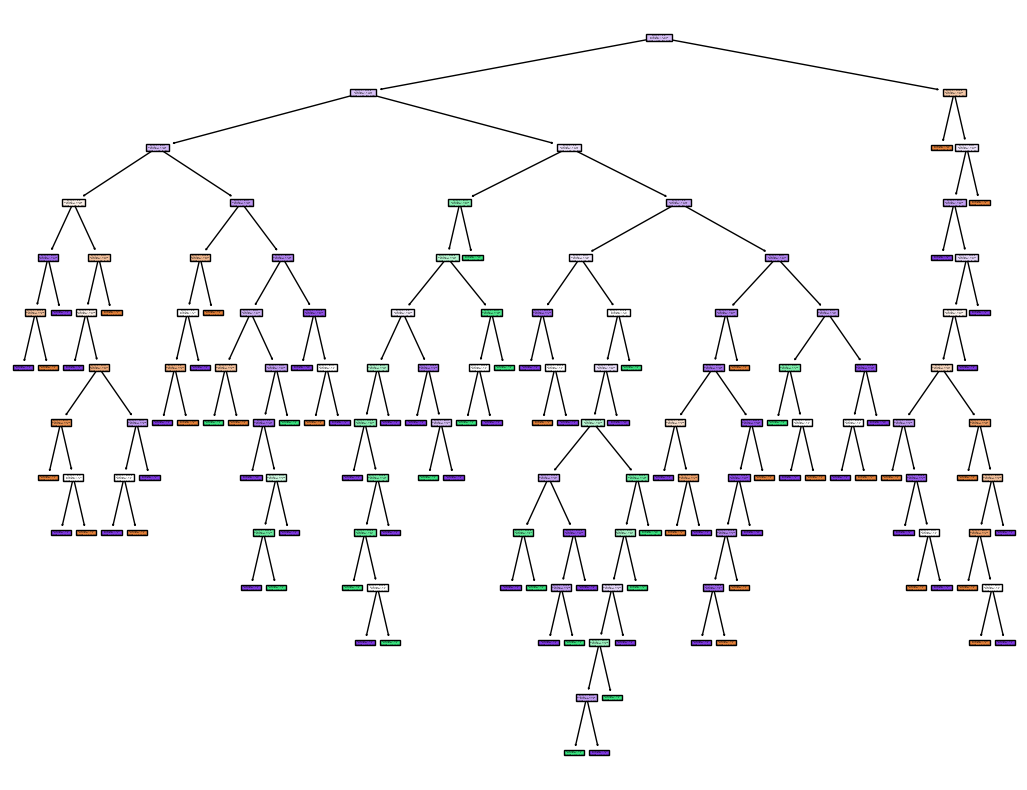

In [ ]:
plt.figure(figsize=(13,10))
tree.plot_tree(model_entropy,filled=True)
plt.show()

#Predicting On Test data

In [ ]:
preds = model_entropy.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

2    46
0    20
1    14
dtype: int64

#Classificatiion report

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.57      0.40      0.47        20
           2       0.65      0.75      0.70        40

    accuracy                           0.66        80
   macro avg       0.66      0.63      0.64        80
weighted avg       0.66      0.66      0.65        80



In [ ]:
path = model_entropy.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='entropy',random_state=10, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.17009894607233478


#Accuracy vs alpha for traing and testing

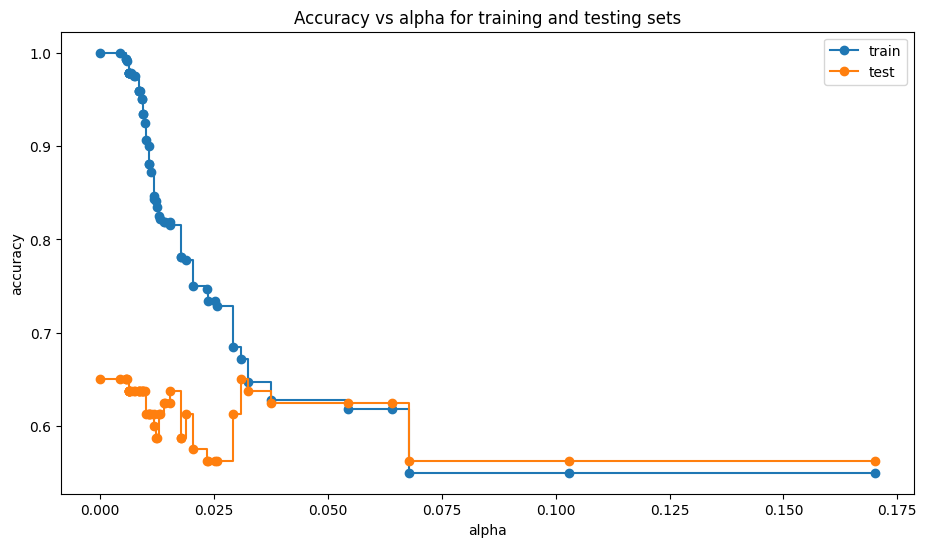

In [ ]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(11,6))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

#Choosing the best value of cc_alpha where the testing and training accuracy are almost same or near or closer to each other

In [ ]:
clf1 = DecisionTreeClassifier(criterion='entropy',random_state=122, ccp_alpha= 0.170098)
clf1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.170098, criterion='entropy',
                       random_state=122)

In [ ]:
pred_train1 = clf1.predict(x_train)
pred_test1 = clf1.predict(x_test)
print('Training Accuracy :',accuracy_score(y_train, pred_train).round(3),'\n'
      'Testing Accuracy  :',accuracy_score(y_test, pred_test).round(3))

Training Accuracy : 0.816 
Testing Accuracy  : 0.638


              precision    recall  f1-score   support

           0       0.57      0.60      0.59        20
           1       0.00      0.00      0.00        20
           2       0.56      0.82      0.67        40

    accuracy                           0.56        80
   macro avg       0.38      0.47      0.42        80
weighted avg       0.42      0.56      0.48        80



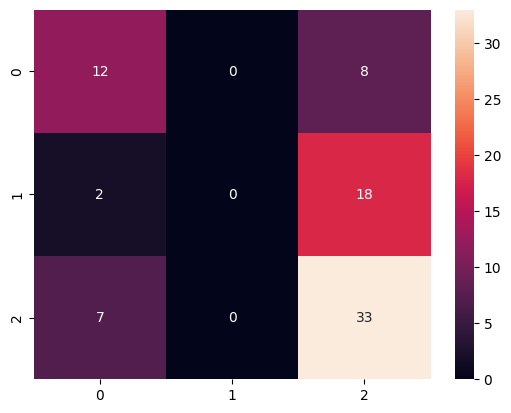

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred_test1),annot=True)
print(classification_report(y_test,pred_test1))

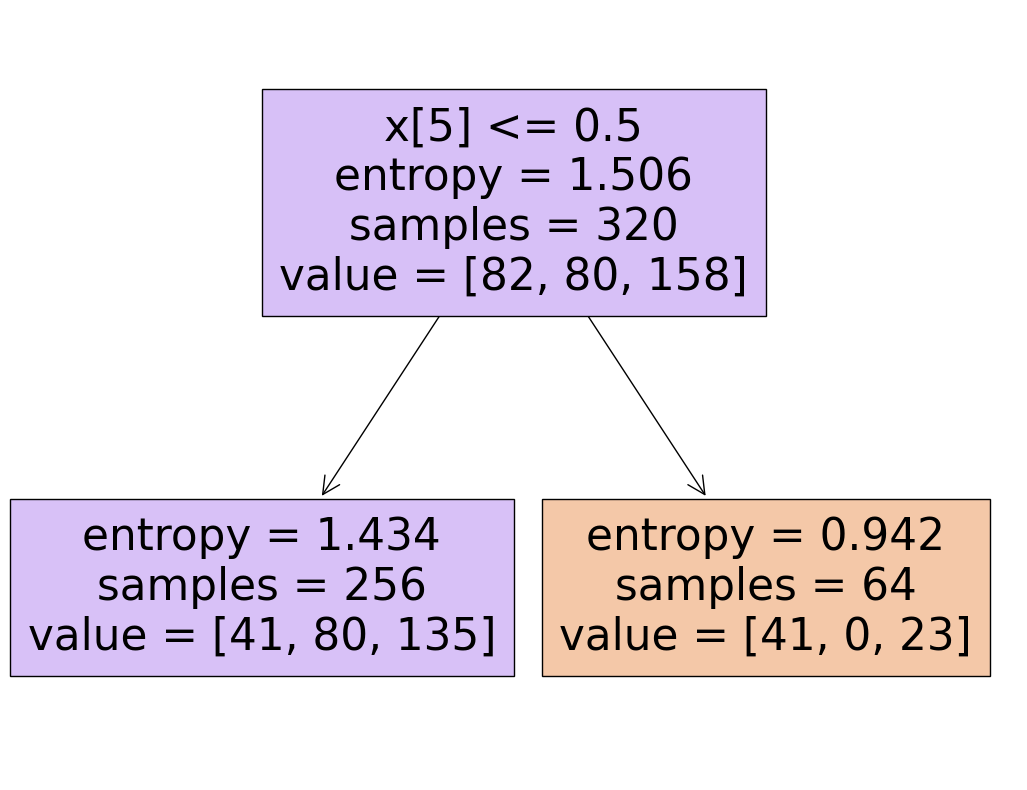

In [ ]:
plt.figure(figsize=(13,10))
tree.plot_tree(clf1,filled=True)
plt.show()

#Building Decision Tree Classifier using Gini Criteria with Alpha values Post Pruning

In [ ]:
model_gini = DecisionTreeClassifier(criterion='gini', random_state=11)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(random_state=11)

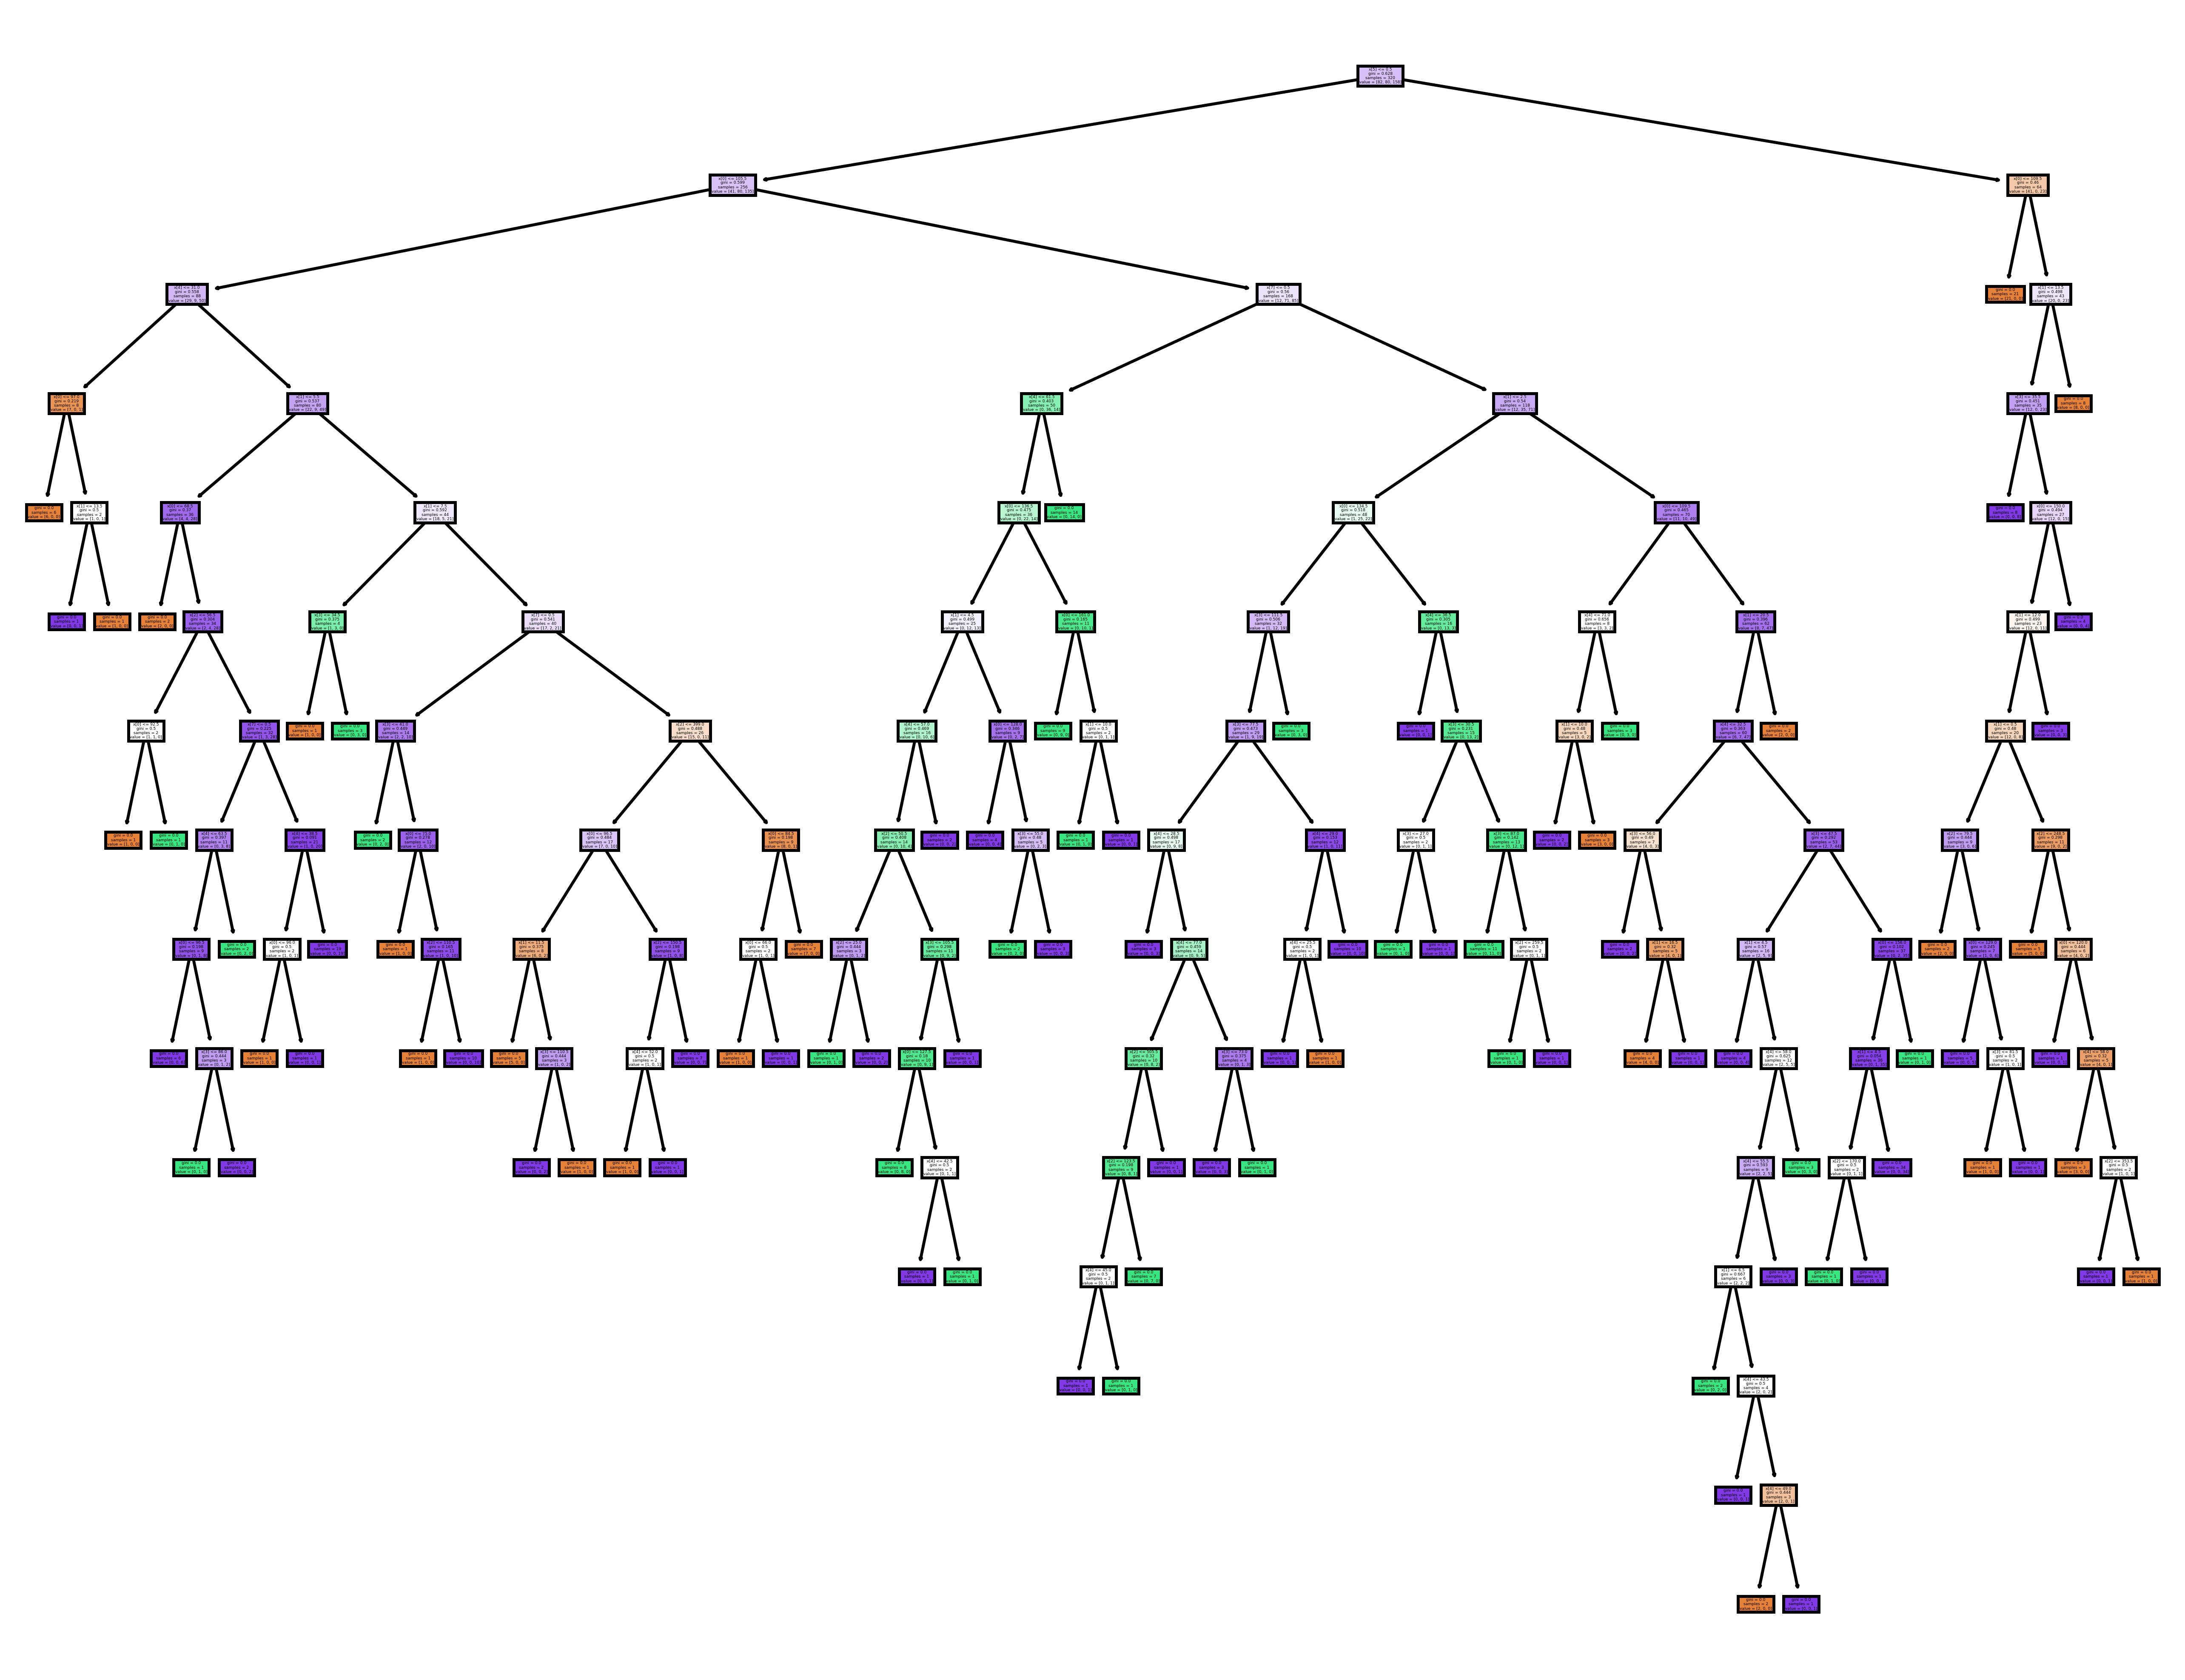

In [ ]:
plt.figure(figsize=(13,10),dpi=500)
tree.plot_tree(model_gini,filled=True)
plt.show()

#predicting on test data

In [ ]:
preds = model_gini.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

2    44
0    20
1    16
dtype: int64

#Classification report

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        20
           1       0.56      0.45      0.50        20
           2       0.64      0.70      0.67        40

    accuracy                           0.64        80
   macro avg       0.63      0.62      0.62        80
weighted avg       0.63      0.64      0.63        80



In [ ]:
path = model_gini.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini',random_state=20, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05707519531250005


#Accuracy vs alpha for training and testing sets

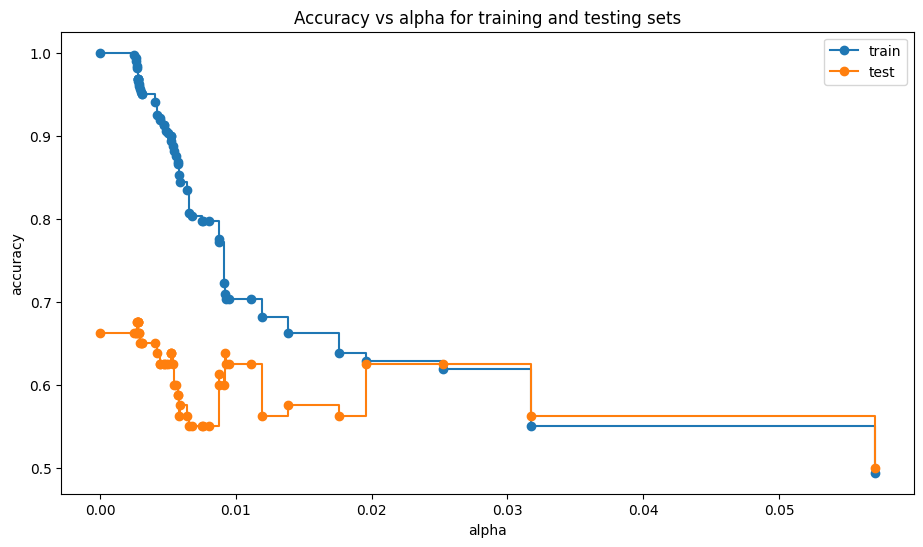

In [ ]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(11,6))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

#Choosing the best value of cc_alpha where the testing and training accuracy are almost same or near or closer to each other

In [ ]:
clf2 = DecisionTreeClassifier(criterion='gini',random_state=125, ccp_alpha= 0.057075)
clf2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.057075, random_state=125)

In [ ]:
pred_train2 = clf2.predict(x_train)
pred_test2 = clf2.predict(x_test)

print('Training Accuracy :',accuracy_score(y_train, pred_train).round(3),'\n'
      'Testing Accuracy  :',accuracy_score(y_test, pred_test).round(3))

Training Accuracy : 0.816 
Testing Accuracy  : 0.638


              precision    recall  f1-score   support

           0       0.57      0.60      0.59        20
           1       0.00      0.00      0.00        20
           2       0.56      0.82      0.67        40

    accuracy                           0.56        80
   macro avg       0.38      0.47      0.42        80
weighted avg       0.42      0.56      0.48        80



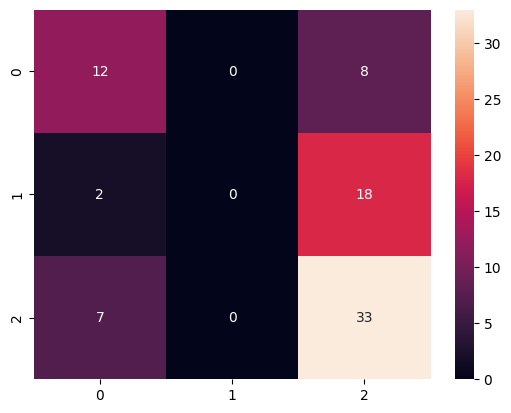

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred_test2),annot=True)
print(classification_report(y_test,pred_test2))

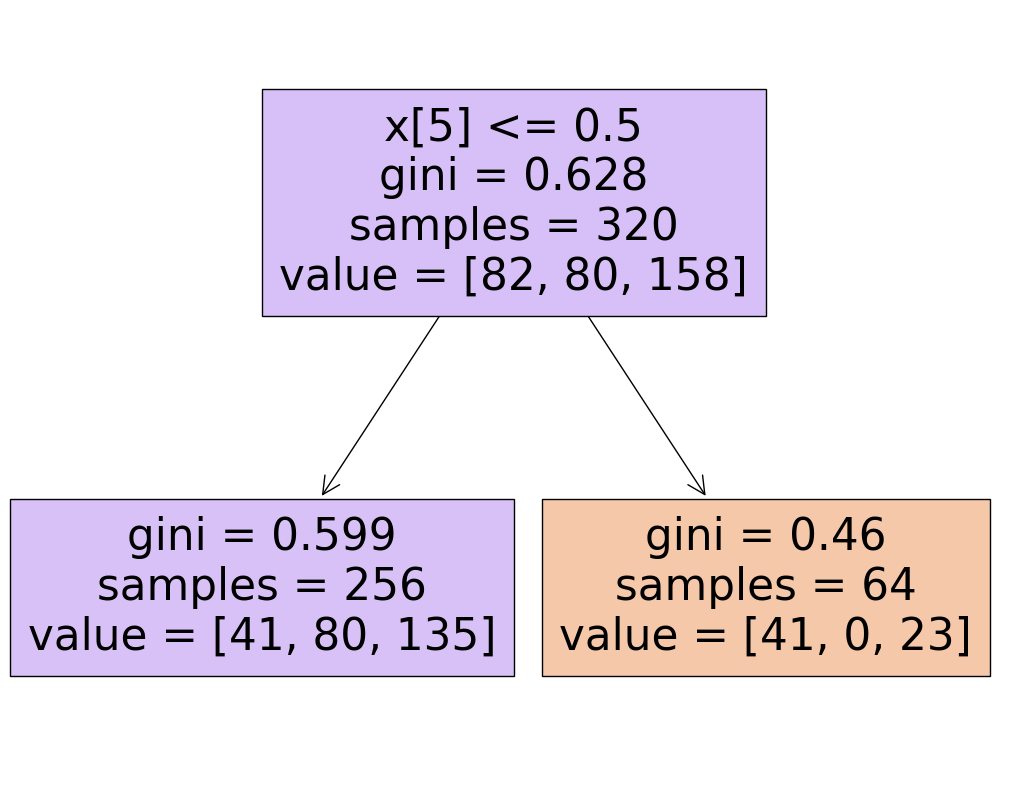

In [ ]:
plt.figure(figsize=(13,10))
tree.plot_tree(clf2,filled=True)
plt.show()

#9. Model Evaluation

#Using best paramters: 'criterion': 'entropy', 'max_depth': 8 (GridSearchCV)

In [ ]:
print(f"Training Accuracy: {accuracy_score(y_train, pred_train) * 100:.2f}%")
print(f"Testing Accuracy : {accuracy_score(y_test, pred_test) * 100:.2f}%")

Training Accuracy: 81.56%
Testing Accuracy : 63.75%


#Using Entropy Criteria with Alpha values

In [ ]:
print(f"Training Accuracy: {accuracy_score(y_train, pred_train1) * 100:.2f}%")
print(f"Testing Accuracy : {accuracy_score(y_test, pred_test1) * 100:.2f}%")

Training Accuracy: 55.00%
Testing Accuracy : 56.25%


#Using Gini Criteria with Alpha values

In [ ]:
print(f"Training Accuracy: {accuracy_score(y_train, pred_train2) * 100:.2f}%")
print(f"Testing Accuracy : {accuracy_score(y_test, pred_test2) * 100:.2f}%")

Training Accuracy: 55.00%
Testing Accuracy : 56.25%


#10. Model Deployement

In [ ]:
from pickle import dump

In [ ]:
dump(tree_clf,open('company_data_intell.pkl','wb'))

#The End